<a href="https://colab.research.google.com/github/viviakemik/machine-learning/blob/main/statistics/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Book: https://www.amazon.com.br/Practical-Statistics-Scientists-Peter-Bruce/dp/1491952962

2. Courses
 * https://www.coursera.org/learn/statistics-for-data-science-python
 * https://thecrashcourse.com/courses/statistics
 * https://www.youtube.com/watch?v=qBigTkBLU6g&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9

3. https://github.com/gedeck/practical-statistics-for-data-scientists

https://towardsdatascience.com/get-familiar-with-the-most-important-weapon-of-data-science-variables-48cc7cd85dc5


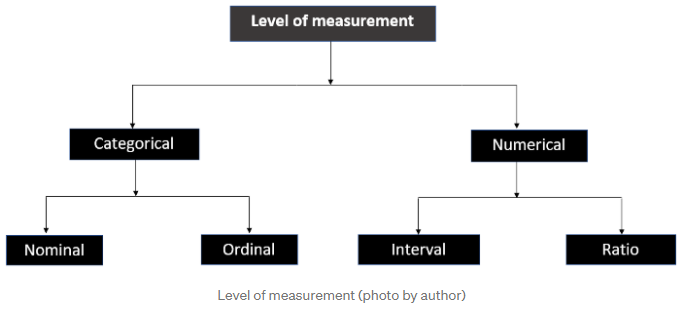

In [88]:
pip install wquantiles

In [89]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [90]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'drive/MyDrive/Colab Notebooks/Pratical Statistics Data Scientist/data'

In [91]:
AIRLINE_STATS_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv'
AIRPORT_DELAYS_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv'
STATE_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


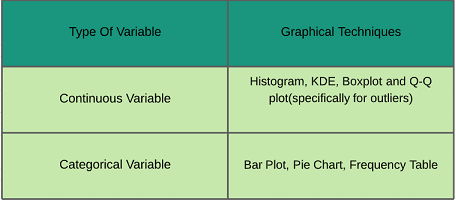

# **Estimates of Location**

In [93]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


**Mean:** The sum of all values divided by the number of values.

In [94]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3


**Trimmed mean:** The average of all values after dropping a fixed number of extreme values.

In [95]:
print(trim_mean(state['Population'], 0.1))

4783697.125


**Median (50th percentile):** The value such that one-half of the data lies above and below.

* since the mean is much more sensitive to the data, there are many instances in
which the median is a better metric for location.

* If mean = median => distribution is symmetric

http://www.randomlearnings.com/statistics/statistics_3m

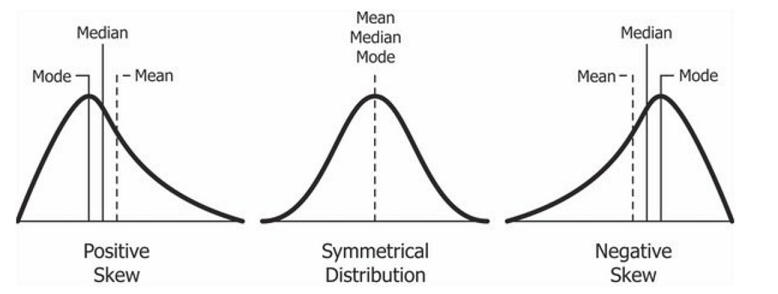



In [96]:
print(state['Population'].median())

4436369.5


In [97]:
print(state['Murder.Rate'].mean())

4.066


**Weighted mean:** The sum of all values times a weight divided by the sum of the weights.

* Some values are intrinsically more variable than others, and highly variable
observations are given a lower weight.
* The data collected does not equally represent the different groups that we are
interested in measuring.

In [98]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


For weighted median, we can use the specialized package wquantiles:

In [99]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


## **Outliers**

Being an outlier in itself does not make a data value invalid or erroneous

When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will still be valid.

# **Estimates of Variability**

Neither the variance, the standard deviation, nor the mean absolute deviation is
robust to outliers and extreme values

In [100]:
# Table 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


**Standard Deviation:** The square root of the variance

Source: https://www.youtube.com/watch?v=R4yfNi_8Kqw&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=5

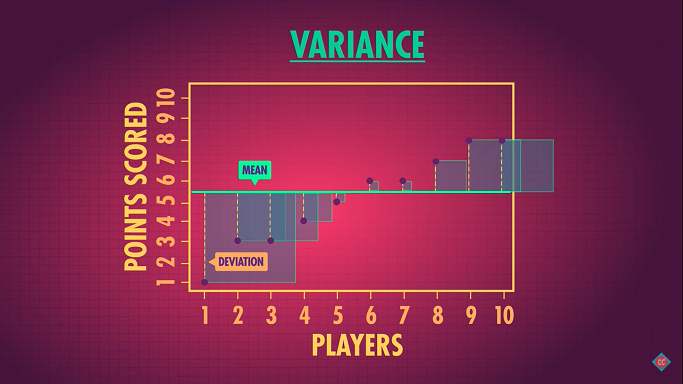

In [101]:
print(state['Population'].std())

6848235.347401142


In [102]:
print(state['Population'].var())

46898327373394.445


Like the median, the MAD is not influenced by extreme values.

In [103]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


## **Estimates Based on Percentiles**

For very large data sets, calculating exact percentiles can be computationally very expensive since it requires sorting all the data values.

Source: https://en.wikipedia.org/wiki/Percentile_rank

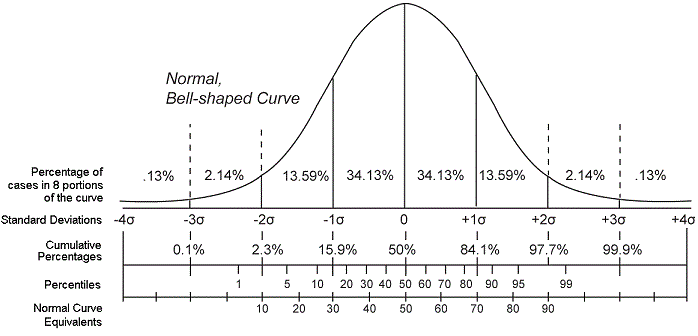

In [104]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


# **Exploring the Data Distribution**

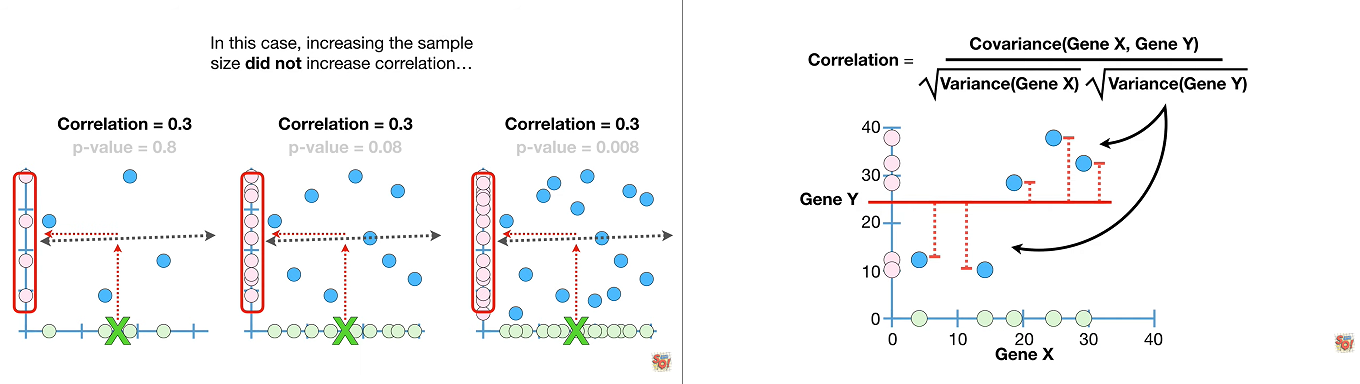

## **Percentiles and Boxplots**

In [105]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [106]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


Source: https://www.youtube.com/watch?v=bPFNxD3Yg6U&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=8

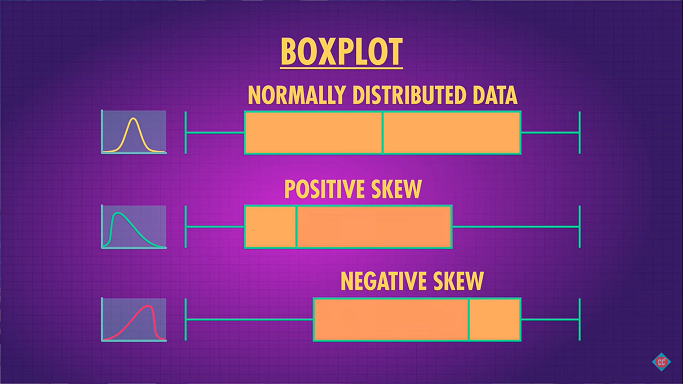

Source: https://www.irceline.be/en/air-quality/measurements/particulate-matter/history/trends/boxplot

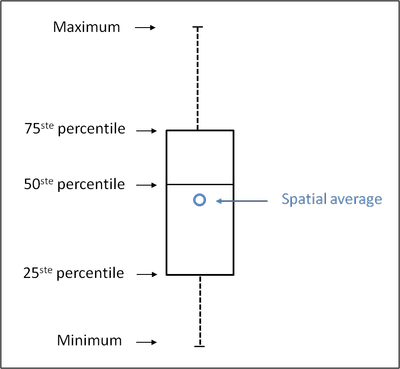

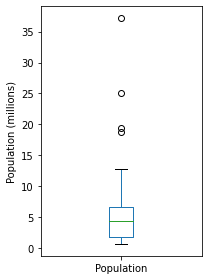

In [107]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

* The median is shown by the horizontal line in the box
* The top and bottom of the box are the 75th and 25th percentiles
* The median state population is about 5 million
* half the states fall between about 2 million and about 7 million
* there are some high population outliers (circles)

## **Frequency Tables and Histograms**

In [108]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


In [109]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  ...                                             States
0    (526935.67, 4232659.0]  ...  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...
1    (4232659.0, 7901692.0]  ...          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA
2   (7901692.0, 11570725.0]  ...                                  VA,NJ,NC,GA,MI,OH
3  (11570725.0, 15239758.0]  ...                                              PA,IL
4  (15239758.0, 18908791.0]  ...                                                 FL
5  (18908791.0, 22577824.0]  ...                                                 NY
6  (22577824.0, 26246857.0]  ...                                                 TX
7  (26246857.0, 29915890.0]  ...                                                   
8  (29915890.0, 33584923.0]  ...                                                   
9  (33584923.0, 37253956.0]  ...                                                 CA

[10 rows x 3 columns]


* The least populous state is Wyoming, with 563,626 people
* the most populous is California, with 37,253,956 people.
* This gives us a range of 37,253,956 – 563,626 =
36,690,330, which we must divide up into equal size bins (Ex: 10 bins)

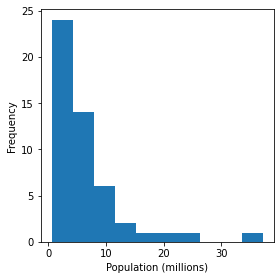

In [110]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

* each bin will have a width of 3,669,033
* Bins are of equal width
* Bars are contiguous (no empty space)

## **Density Plots and Estimates**

Density is an alternative to histograms that can provide more insight into the distribution of the data points (smoothed histogram)

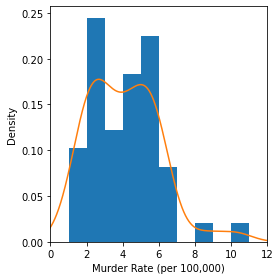

In [111]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

* the total area under the density curve = 1
* calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution

# **Exploring Binary and Categorical Data**

In [112]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Bar charts, seen often in the popular press, are a common visual tool for displaying a single categorical variable (resembles a histogram)

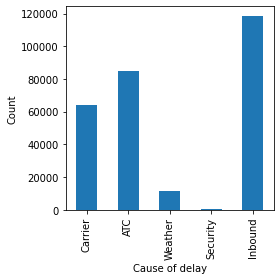

In [113]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## **Expected Value**

A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale.

Ex: two levels of service, one priced at 300/month and another at
50/month. The firm figures that 5% of the attendees will sign up for the 300 service, 15% will sign up for the 50 service, and 80% will not sign up for anything.

EV = (0.05)(300) + (0.15)(50) + (0.80)(0) = 22.5

# **Correlation**

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data.

Source: https://www.youtube.com/watch?v=xZ_z8KWkhXE&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=16

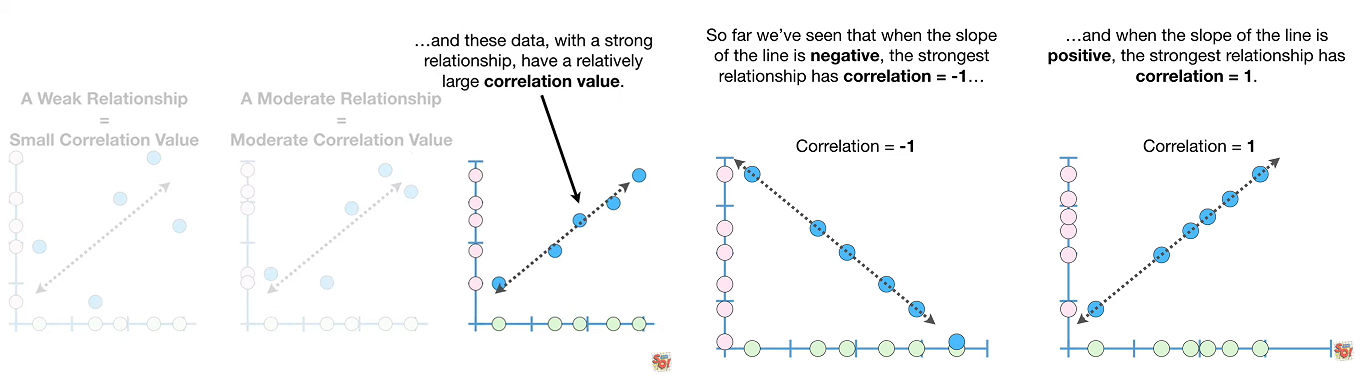

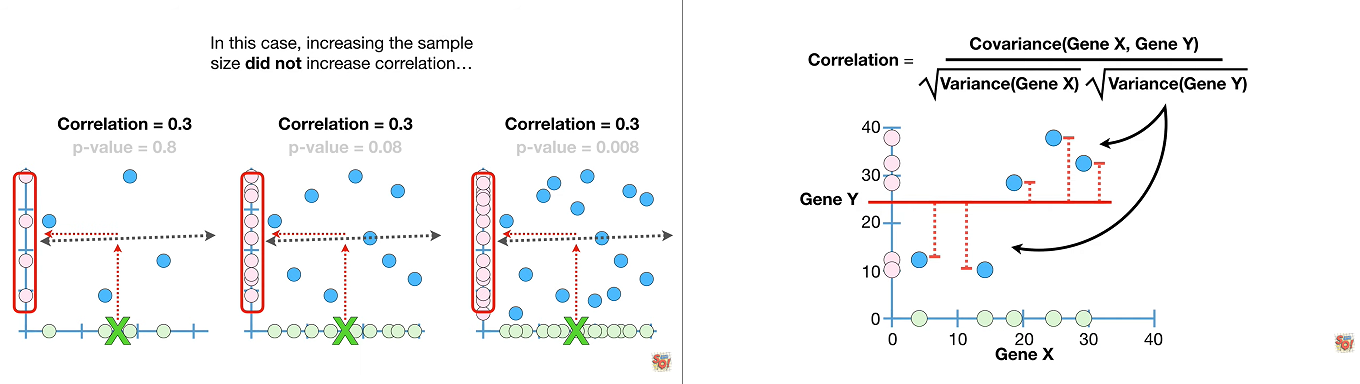

https://www.youtube.com/watch?v=GtV-VYdNt_g&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=9

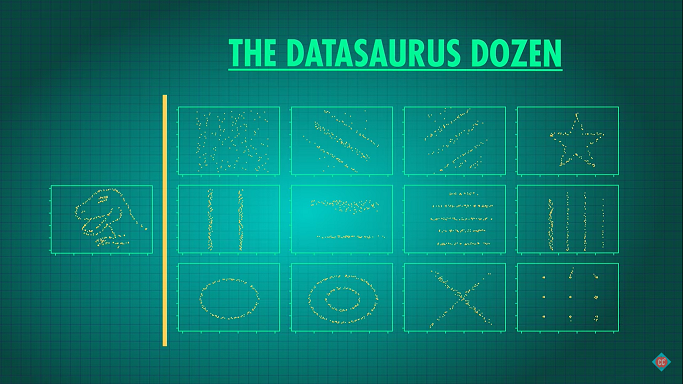

https://www.youtube.com/watch?v=2AQKmw14mHM&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=19

$R^2$

* How much of the variance in one variable is predicted by the other

* Use R (correlation) to see if it is a positive or negative relationship

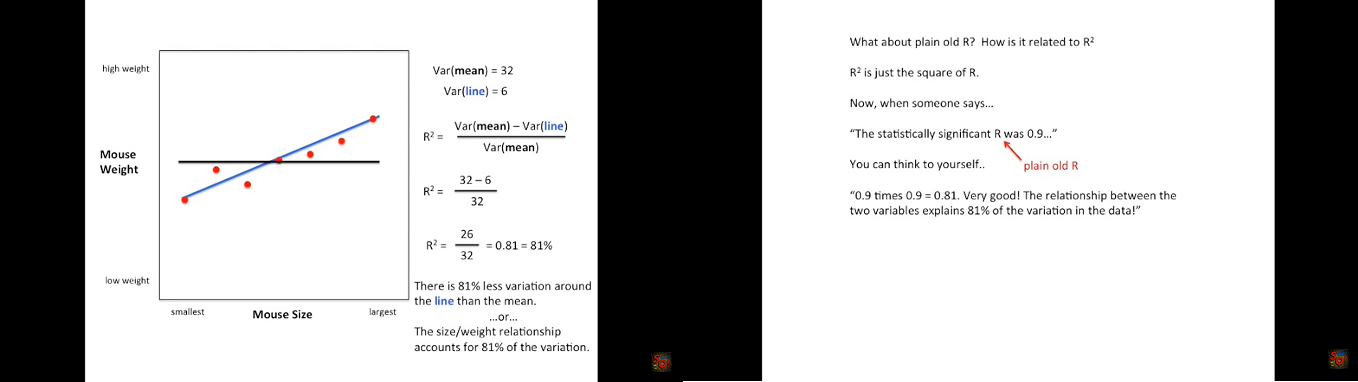

In [114]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

**Correlation matrix:** A table where the variables are shown on both rows and columns, and the cell
values are the correlations between the variables.

In [115]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


Filter for major exchange-traded funds (ETFs)

In [116]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY  ...       XLP       XLF       XLK
2012-07-02 -0.376098  0.096313  0.028223  ...  0.313499  0.018999  0.075668
2012-07-03  0.376099  0.481576  0.874936  ...  0.129087  0.104492  0.236462
2012-07-05  0.150440  0.096313 -0.103487  ... -0.073766 -0.142490  0.066211
2012-07-06 -0.141040 -0.491201  0.018819  ...  0.119865  0.066495 -0.227003
2012-07-09  0.244465 -0.048160 -0.056445  ... -0.064548  0.018999  0.009457

[5 rows x 17 columns]


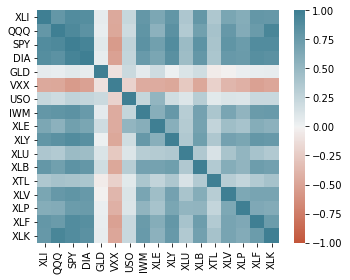

In [117]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

* The ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. 
* Similarly, the QQQ and the XLK, composed mostly of technology companies,
are positively correlated. 
* Defensive ETFs, such as those tracking gold prices (GLD),
oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with the other ETFs.

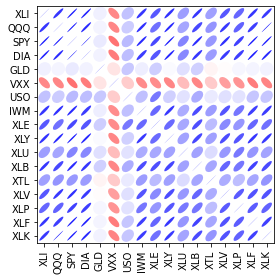

In [118]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

The orientation of the ellipse indicates whether two variables are positively correlated or negatively correlated

## **Scatterplots**

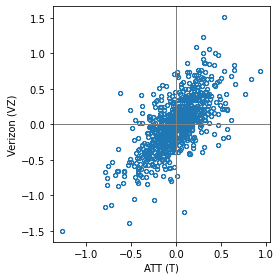

In [119]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_line1)


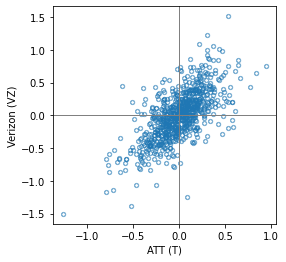

In [120]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

# **Exploring Two or More Variables**

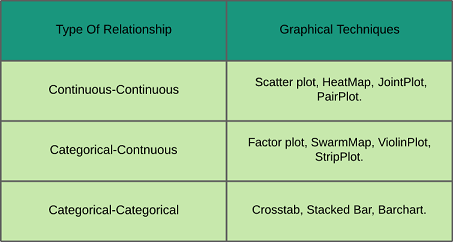

In [121]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


## **Hexagonal Binning and Contours (Numeric x Numeric)**

Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin.

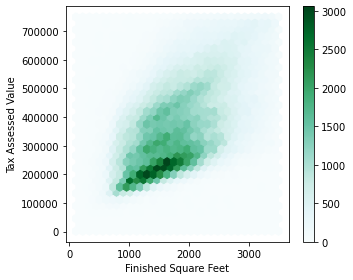

In [122]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

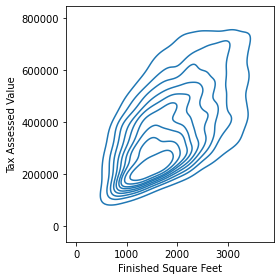

In [124]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

each contour band represents a specific density of points, increasing as
one nears a “peak.”

https://www.amazon.com.br/Practical-Statistics-Scientists-Peter-Bruce/dp/1491952962

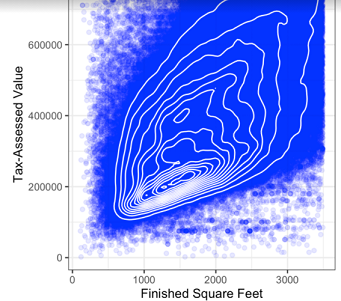

## **Two Categorical Variables**

In [125]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

**Contingency table:** a table of counts by category

The margins keyword argument will add the column and row sums.

In [126]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [127]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## **Categorical and Numeric Data**

The pandas boxplot method takes the by argument that splits the data set into groups and creates the individual boxplots:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


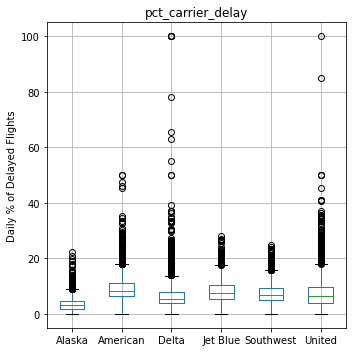

In [128]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

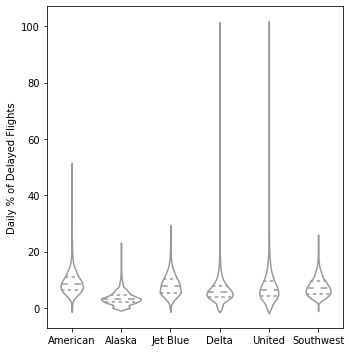

In [129]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

* The advantage of a violin plot is that it can show nuances in the distribution
that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

* The violin plot shows a concentration in the distribution near zero for Alaska and, to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot.

## **Visualizing Multiple Variables**

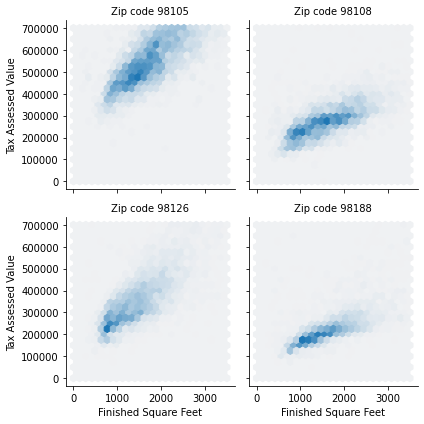

In [130]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

# **Extra**

https://extremepresentation.com/

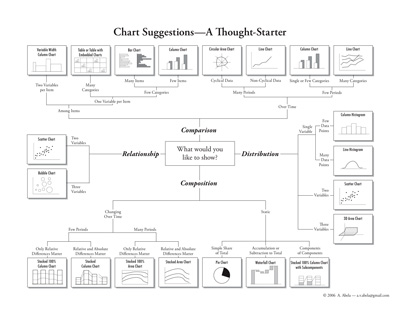